In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# Load Data

In [13]:
train = pd.read_csv("train_sample.csv")
test = pd.read_csv("test_sample.csv")

In [14]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [15]:
x_test = test.iloc[:,1:]
y_test = test.iloc[:,0]
print(x_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


In [16]:
x1 = x_train.iloc[0,:].values.reshape(28,28)

In [17]:
x1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
x1[x1 > 0] = 1

In [19]:
x1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 

In [20]:
x1 = pd.DataFrame(x1)

In [21]:
x1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,0,0,0,0


In [22]:
x1.to_csv("one.csv")

In [23]:
train_sample = np.random.choice(range(0,x_train.shape[0]),replace=False,size=5)

In [24]:
test_sample = np.random.choice(range(0,x_test.shape[0]),replace=False,size=5)

In [25]:
train_sample

array([1395, 1466, 1897, 3643, 2415])

In [26]:
test_sample

array([595, 706, 753, 626, 657])

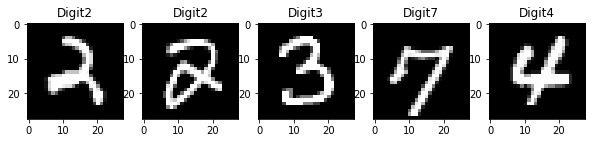

In [27]:
plt.figure(figsize=(10,5))
for i,j in enumerate(train_sample):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train.iloc[j,:].values.reshape(28,28))
    plt.title("Digit"+str(y_train[j]))
    plt.gray()

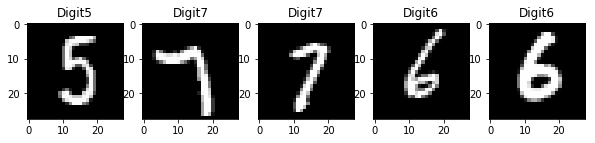

In [28]:
plt.figure(figsize=(10,5))
for i,j in enumerate(test_sample):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test.iloc[j,:].values.reshape(28,28))
    plt.title("Digit"+str(y_test[j]))
    plt.gray()

In [34]:
#Model Building
knn_classifier = KNeighborsClassifier(algorithm="brute",weights="distance")
params = {"n_neighbors":[1],"metric":["euclidean","cityblock"]}

In [35]:
grid = GridSearchCV(knn_classifier,param_grid=params,scoring="accuracy",cv=3)

In [36]:
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1], 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [ ]:
#KNN Regression

In [39]:
data = pd.DataFrame(np.random.randint(low = 2, high = 100, size = (1000,4)), columns = ["Target","A","B","C"])

In [41]:
data.head(4)
data.tail(4)

,Target,A,B,C
996,22,45,28,83
997,58,47,87,89
998,73,86,28,21
999,76,78,23,27


In [44]:
train_x,test_x,train_y,test_y = train_test_split(data.iloc[:,1:],data.Target,test_size=0.2)
print(train_x.shape, test_x.shape)

(800, 3) (200, 3)


In [45]:
scaler = MinMaxScaler()
scaler.fit(train_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
scaled_train_x = pd.DataFrame(scaler.transform(train_x),columns = ["A","B","C"])
scaled_test_x = pd.DataFrame(scaler.transform(test_x),columns = ["A","B","C"])

In [ ]:
# Model Building without Parameter Tuning

In [46]:
knn_regressor = KNeighborsRegressor(n_neighbors=3,algorithm="brute",weights="distance")

In [50]:
knn_regressor.fit(scaled_train_x,train_y)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [51]:
test_pred = knn_regressor.predict(scaled_test_x)

In [52]:
mean_squared_error(test_y,test_pred)

1084.3434714643868

In [ ]:
# With Parameter Tuning

In [54]:
knn_regressor = KNeighborsRegressor(algorithm="brute",weights="distance")

In [56]:
params = {"n_neighbors" : [1,3,5], "metric":["euclidean","cityblock"]}

In [57]:
grid = GridSearchCV(knn_regressor,param_grid=params,scoring="neg_mean_squared_error",cv=5)

In [58]:
grid.fit(scaled_train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5], 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [60]:
test_pred_cv = grid.predict(scaled_test_x)

In [61]:
mean_squared_error(test_y,test_pred_cv)

978.3325839484655

In [66]:
# Custom defined mse
def mse(predictions,y):
    mse = (((predictions -y)**2).sum())/len(predictions)
    return mse


In [67]:
mse(test_y,test_pred_cv)

978.3325839484655